# Project Scope & Deliverables
1. Import your data into a Pandas DataFrame.
2. Merge your DataFrames.
3. Create a bubble chart that showcases the average fare versus the total number of rides with bubble size based on the total number of drivers for each city type, including urban, suburban, and rural.
4. Determine the mean, median, and mode for the following:
    - The total number of rides for each city type.
    - The average fares for each city type.
    - The total number of drivers for each city type.
5. Create box-and-whisker plots that visualize each of the following to determine if there are any outliers:
    - The number of rides for each city type.
    - The fares for each city type.
    - The number of drivers for each city type.
6. Create a pie chart that visualizes each of the following data for each city type:
    - The percent of total fares.
    - The percent of total rides.
    - The percent of total drivers.

In [1]:
# Add Matplotlib inline magic command
%matplotlib notebook

In [2]:
# Dependencies and Setup
import os
import pandas as pd
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt

In [3]:
# Make analysis folder
if not os.path.exists("Analysis"):
    os.makedirs('Analysis')

# 1. Import your data into a Pandas DataFrame.

In [4]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [5]:
# Read the city data file and store it in a pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [6]:
# Read the ride data file and store it in a pandas DataFrame.
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [7]:
# Inspect city data frame
city_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   city          120 non-null    object
 1   driver_count  120 non-null    int64 
 2   type          120 non-null    object
dtypes: int64(1), object(2)
memory usage: 2.9+ KB


In [8]:
# We know from looking at the csv file there is 120 rows of data
# .info() returned 120 rows of non-null data therefore all rows have data in them = :)

# Get a count of all the Null values in each Column
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [9]:
# Get the unique values of the type of city.
city_types = city_data_df["type"].unique()
city_types

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [10]:
# Get the number of data points from the Urban cities.
sum(city_data_df["type"]=="Urban")

66

In [11]:
# Get the number of data points from the Suburban cities.
sum(city_data_df["type"]=="Suburban")

36

In [12]:
# Get the number of data points from the Rural cities.
sum(city_data_df["type"]=="Rural")

18

In [13]:
# Inspect ride data frame
ride_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2375 entries, 0 to 2374
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   city     2375 non-null   object 
 1   date     2375 non-null   object 
 2   fare     2375 non-null   float64
 3   ride_id  2375 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 74.3+ KB


In [14]:
# We know from looking at the csv file there is 2375 rows of data
# .info() returned 2375 rows of non-null data therefore all rows have data in them = :)

# Get a count of all the Null values in each Column
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

# 2. Merge your DataFrames.

In [15]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, on=["city", "city"], how = "left" )

# Display the DataFrame
pyber_data_df.head(10)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437,10,Urban
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091,44,Urban
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754,21,Urban
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694,4,Urban
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789,33,Urban


In [16]:
pyber_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2375 entries, 0 to 2374
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   city          2375 non-null   object 
 1   date          2375 non-null   object 
 2   fare          2375 non-null   float64
 3   ride_id       2375 non-null   int64  
 4   driver_count  2375 non-null   int64  
 5   type          2375 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 129.9+ KB


# 3. Create a bubble chart

In [17]:
# Create the Urban city DataFrame.
urban_cities_df = pyber_data_df [pyber_data_df["type"] == "Urban"]

urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [18]:
# Create the Suburban city DataFrame.
suburban_cities_df = pyber_data_df [pyber_data_df["type"] == "Suburban"]

suburban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2019-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,East Kentstad,2019-04-07 19:44:19,18.75,6575961095852,20,Suburban
1627,Lake Omar,2019-01-17 21:33:35,21.71,966911700371,22,Suburban
1628,Myersshire,2019-02-27 17:38:39,17.10,5706770909868,19,Suburban
1629,West Hannah,2019-04-19 01:06:59,37.78,2273047151891,12,Suburban


In [19]:
# Create the Rural city DataFrame
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]

rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [20]:
# Get the number of rides for urban cities
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [21]:
# Get the number of rides for suburban cities
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count.head()

city
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
Name: ride_id, dtype: int64

In [22]:
# Get the number of rides for rural cities
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count.head()

city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64

In [23]:
# Get average fare for each urban city.
urban_avg_fare_bycity = urban_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare_bycity.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [24]:
# Get average fare for each suburban city.
suburban_avg_fare_bycity = suburban_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare_bycity.head()

city
Barronchester    36.422500
Bethanyland      32.956111
Brandonfort      35.437368
Colemanland      30.894545
Davidfurt        31.995882
Name: fare, dtype: float64

In [25]:
# Get average fare for each rural city.
rural_avg_fare_bycity = rural_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare_bycity.head()

city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Jessicaport       36.013333
Lake Jamie        34.358333
Name: fare, dtype: float64

In [26]:
# Get the average number of drivers for each urban city.
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [27]:
# Get the average number of drivers for each suburban city.
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count.head()

city
Barronchester    11.0
Bethanyland      22.0
Brandonfort      10.0
Colemanland      23.0
Davidfurt        23.0
Name: driver_count, dtype: float64

In [28]:
# Get the average number of drivers for each rural city.
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count.head()

city
Bradshawfurt      7.0
Garzaport         7.0
Harringtonfort    4.0
Jessicaport       1.0
Lake Jamie        4.0
Name: driver_count, dtype: float64

<IPython.core.display.Javascript object>


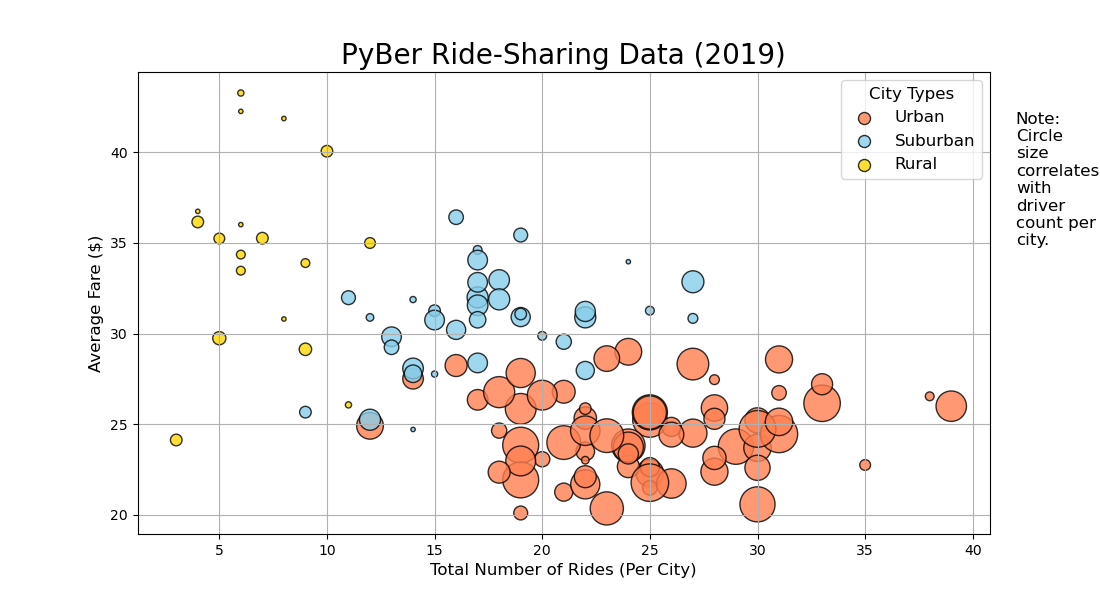

In [29]:
# Create the bubble chart
plt.figure(1, figsize=(11, 6))
plt.scatter(urban_ride_count , urban_avg_fare_bycity , s=10*urban_driver_count , c="coral", edgecolor="black", linewidths=1 , alpha=0.8, label="Urban" )
plt.scatter(suburban_ride_count,suburban_avg_fare_bycity , s=10*suburban_driver_count , c="skyblue", edgecolor="black", linewidths=1, alpha=0.8, label="Suburban")
plt.scatter(rural_ride_count , rural_avg_fare_bycity , s=10*rural_driver_count , c="gold" , edgecolor="black" , linewidths=1 , alpha=0.8, label="Rural")

# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Graph properties
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

# Incorporate a text label about circle size.
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12", wrap= True)
plt.show()

# Save the figure in the analysis folder
plt.savefig("Analysis/Fig1.png")


In [30]:
%whos

Variable                   Type         Data/Info
-------------------------------------------------
city_data_df               DataFrame                    city  dri<...>n\n[120 rows x 3 columns]
city_data_to_load          str          Resources/city_data.csv
city_types                 ndarray      3: 3 elems, type `object`, 24 bytes
lgnd                       Legend       Legend
np                         module       <module 'numpy' from 'C:\<...>ges\\numpy\\__init__.py'>
os                         module       <module 'os' from 'C:\\Us<...>\\anaconda3\\lib\\os.py'>
pd                         module       <module 'pandas' from 'C:<...>es\\pandas\\__init__.py'>
plt                        module       <module 'matplotlib.pyplo<...>\\matplotlib\\pyplot.py'>
pyber_data_df              DataFrame                        city <...>\n[2375 rows x 6 columns]
ride_data_df               DataFrame                        city <...>\n[2375 rows x 4 columns]
ride_data_to_load          str          R

# 4. Calculate Summary Statistics (mean,median,mode)
    - The total number of rides for each city type.
    - The average fares for each city type.
    - The total number of drivers for each city type.

In [31]:
# Get summary statistics for urban cities
print("Urban")
print(urban_cities_df.describe())

print("Suburban")
print(suburban_cities_df.describe())

print("Rural")
print(rural_cities_df.describe())

Urban
              fare       ride_id  driver_count
count  1625.000000  1.625000e+03   1625.000000
mean     24.525772  4.873485e+12     36.678154
std      11.738649  2.907440e+12     20.075545
min       4.050000  1.458810e+10      3.000000
25%      14.550000  2.400244e+12     22.000000
50%      24.640000  4.711188e+12     37.000000
75%      34.580000  7.451579e+12     52.000000
max      44.970000  9.991538e+12     73.000000
Suburban
             fare       ride_id  driver_count
count  625.000000  6.250000e+02    625.000000
mean    30.970128  4.971015e+12     13.712000
std     10.677508  2.912410e+12      8.042372
min     12.050000  3.218337e+08      1.000000
25%     21.970000  2.364253e+12      5.000000
50%     30.750000  5.053221e+12     16.000000
75%     39.830000  7.551674e+12     21.000000
max     49.960000  9.917744e+12     25.000000
Rural
             fare       ride_id  driver_count
count  125.000000  1.250000e+02    125.000000
mean    34.623440  4.647746e+12      4.296000
std 

### Summary Statistics for number of rides for each city type.

In [32]:
# Urban cities.
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


In [33]:
# Suburban cities.
mean_suburban_ride_count = np.mean(suburban_ride_count)
print(f"The mean for the ride counts for suburban trips is {mean_suburban_ride_count:.2f}.")

median_suburban_ride_count = np.median(suburban_ride_count)
print(f"The median for the ride counts for suburban trips is {median_suburban_ride_count}.")

mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for the ride counts for suburban trips is {mode_suburban_ride_count}.")

The mean for the ride counts for suburban trips is 17.36.
The median for the ride counts for suburban trips is 17.0.
The mode for the ride counts for suburban trips is ModeResult(mode=array([17], dtype=int64), count=array([7])).


In [34]:
# Rural cities.
mean_rural_ride_count = np.mean(rural_ride_count)
print(f"The mean for the ride counts for rural trips is {mean_rural_ride_count:.2f}.")

median_rural_ride_count = np.median(rural_ride_count)
print(f"The median for the ride counts for suburban trips is {median_rural_ride_count}.")

mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for rural trips is {mode_rural_ride_count}.")

The mean for the ride counts for rural trips is 6.94.
The median for the ride counts for suburban trips is 6.0.
The mode for the ride counts for rural trips is ModeResult(mode=array([6], dtype=int64), count=array([5])).


### Summary Statistics for fares for each city type.

In [35]:
# Urban cities.

# Get the fares for the urban cities.
urban_fares = urban_cities_df["fare"]
urban_fares.head()

# Calculate summary stats
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [36]:
# Suburban cities.

# Get the fares for the urban cities.
suburban_fares = suburban_cities_df["fare"]
suburban_fares.head()

# Calculate summary stats
mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for suburban trips is ${mean_suburban_fares:.2f}.")

median_suburban_fares = np.median(suburban_fares)
print(f"The median fare price for suburban trips is ${median_suburban_fares:.2f}.")

mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode fare price for suburban trips is {mode_suburban_fares}.")

The mean fare price for suburban trips is $30.97.
The median fare price for suburban trips is $30.75.
The mode fare price for suburban trips is ModeResult(mode=array([17.99]), count=array([3])).


In [37]:
# Rural cities.

# Get the fares for the urban cities.
rural_fares = rural_cities_df["fare"]
rural_fares.head()

# Calculate summary stats
mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for rural trips is ${mean_rural_fares:.2f}.")

median_rural_fares = np.median(rural_fares)
print(f"The median fare price for rural trips is ${median_rural_fares:.2f}.")

mode_rural_fares = sts.mode(rural_fares)
print(f"The mode fare price for suburban trips is {mode_rural_fares}.")

The mean fare price for rural trips is $34.62.
The median fare price for rural trips is $37.05.
The mode fare price for suburban trips is ModeResult(mode=array([37.05]), count=array([2])).


### Summary statistics for total number of drivers for each city type.

In [38]:
# Urban cities.

# Get the fares for the urban cities.
urban_drivers = urban_cities_df["driver_count"]
urban_drivers.head()

# Calculate summary stats
mean_urban_drivers = np.mean(urban_drivers)
print(f"The mean number of drivers urban cities is {mean_urban_drivers:.2f}.")

median_urban_drivers = np.median(urban_drivers)
print(f"The median number of drivers urban cities is  {median_urban_drivers:.2f}.")

mode_urban_drivers = sts.mode(urban_drivers)
print(f"The mode of the number of drivers urban cities is  {mode_urban_drivers}.")

The mean number of drivers urban cities is 36.68.
The median number of drivers urban cities is  37.00.
The mode of the number of drivers urban cities is  ModeResult(mode=array([39], dtype=int64), count=array([86])).


In [39]:
# Suburban cities.

# Get the fares for the urban cities.
suburban_drivers = suburban_cities_df["driver_count"]
suburban_drivers.head()

# Calculate summary stats
mean_suburban_drivers = np.mean(suburban_drivers)
print(f"The mean number of drivers suburban cities is {mean_suburban_drivers:.2f}.")

median_suburban_drivers = np.median(suburban_drivers)
print(f"The median number of drivers urban cities is  {median_suburban_drivers:.2f}.")

mode_suburban_drivers = sts.mode(suburban_drivers)
print(f"The mode of the number of drivers suburban cities is  {mode_suburban_drivers}.")

The mean number of drivers suburban cities is 13.71.
The median number of drivers urban cities is  16.00.
The mode of the number of drivers suburban cities is  ModeResult(mode=array([20], dtype=int64), count=array([79])).


In [40]:
# Rural cities.

# Get the fares for the urban cities.
rural_drivers = rural_cities_df["driver_count"]
rural_drivers.head()

# Calculate summary stats
mean_rural_drivers = np.mean(rural_drivers)
print(f"The mean number of drivers rural cities is {mean_rural_drivers:.2f}.")

median_rural_drivers = np.median(rural_drivers)
print(f"The median number of drivers rural cities is  {median_rural_drivers:.2f}.")

mode_rural_drivers = sts.mode(rural_drivers)
print(f"The mode of the number of drivers rural cities is  {mode_rural_drivers}.")

The mean number of drivers rural cities is 4.30.
The median number of drivers rural cities is  4.00.
The mode of the number of drivers rural cities is  ModeResult(mode=array([1], dtype=int64), count=array([32])).


# 5. Create box-and-whisker plots 
    - The number of rides for each city type.
    - The fares for each city type.
    - The number of drivers for each city type.

### The number of rides for each city type.

In [41]:
# # Plot all ride count box-and-whisker plots to the same graph.
# x_labels = ["Urban", "Suburban","Rural"]
# ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]

# fig, ax = plt.subplots(figsize=(10, 6))
# ax.boxplot(ride_count_data, labels=x_labels)

# # plot formatting
# ax.set_title('Ride Count Data (2019)',fontsize=20)
# ax.set_ylabel('Number of Rides',fontsize=14)
# ax.set_xlabel("City Types",fontsize=14)
# ax.set_yticks(np.arange(0, 45, step=3.0))
# ax.grid()

# # Save the figure.
# plt.savefig("analysis/Fig2.png")
# plt.show()

<IPython.core.display.Javascript object>


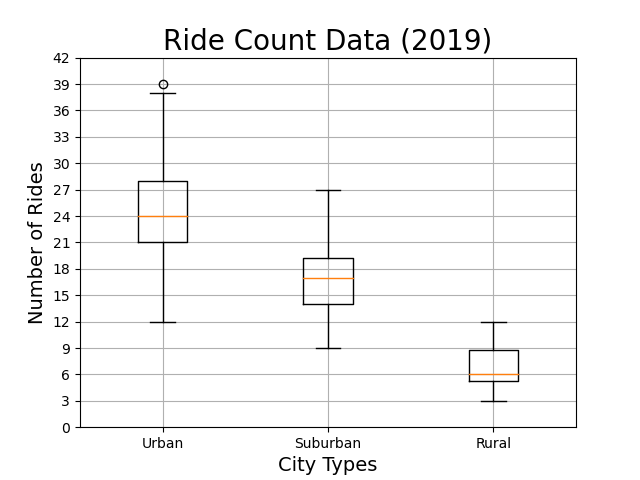

In [42]:
# Plot all ride count box-and-whisker plots to the same graph.
plt.figure(2)
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]

plt.boxplot(ride_count_data, labels=x_labels, notch=False, vert = True)
plt.show()

# plot formatting
plt.title('Ride Count Data (2019)',fontsize=20)
plt.ylabel('Number of Rides',fontsize=14)
plt.xlabel("City Types",fontsize=14)
plt.yticks(np.arange(0, 45, step=3.0))
plt.grid()

# Save the figure.
plt.savefig("analysis/Fig2.png")

In [43]:
# Get the city that matches 39 (the outlier in the Urban Ride Count Data)
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


### Fares price for each city type.

<IPython.core.display.Javascript object>


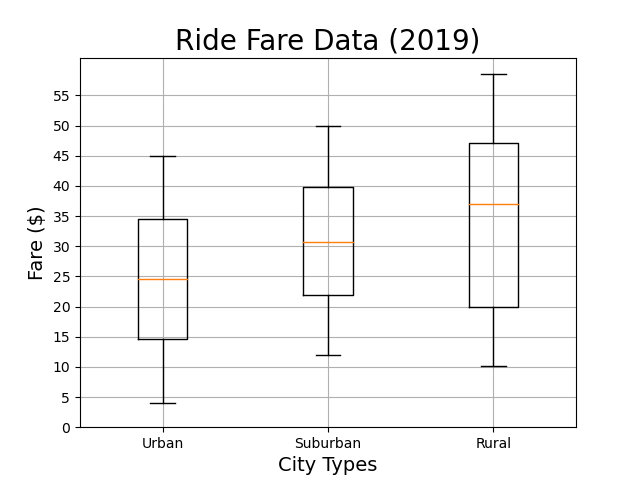

In [44]:
# Plot all ride fare box-and-whisker plots to the same graph.
plt.figure(3)
fare_data = [urban_fares, suburban_fares, rural_fares]

plt.boxplot(fare_data, labels=x_labels, notch=False, vert = True)
plt.show()

# plot formatting
plt.title('Ride Fare Data (2019)',fontsize=20)
plt.ylabel('Fare ($)',fontsize=14)
plt.xlabel("City Types",fontsize=14)
plt.yticks(np.arange(0, 60, step=5.0))
plt.grid()

# Save the figure.
plt.savefig("analysis/Fig3.png")

### number of drivers for each city type

<IPython.core.display.Javascript object>


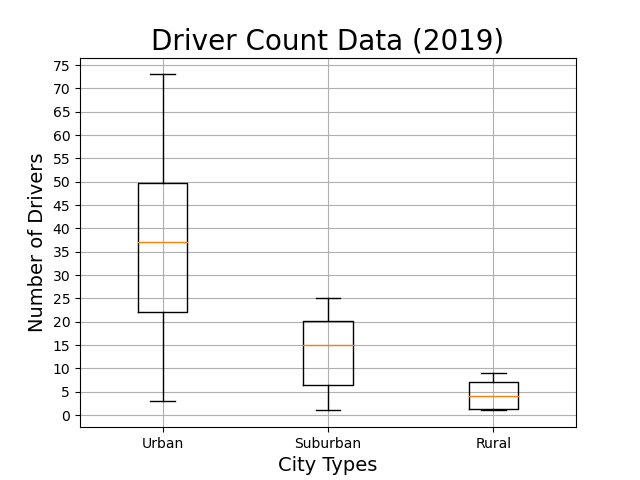

In [45]:
# Plot all driver count box-and-whisker plots to the same graph.
plt.figure(4)
driver_count_data = [urban_driver_count, suburban_driver_count, rural_driver_count]

plt.boxplot(driver_count_data, labels=x_labels, notch=False, vert = True)
plt.show()

# plot formatting
plt.title('Driver Count Data (2019)',fontsize=20)
plt.ylabel('Number of Drivers',fontsize=14)
plt.xlabel("City Types",fontsize=14)
plt.yticks(np.arange(0, 76, step=5.0))
plt.grid()

# Save the figure.
plt.savefig("analysis/Fig4.png")